In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

### US data

In [2]:
#read the file
gdp=pd.read_csv("resources/gdp_over_hours_worked.csv")
gdp.head()

,iso2c,year,country,iso3c,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,...,employed,total_hours_alternative,gdp_over_k_hours_worked,gdp_ppp_over_k_hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
0,1A,1980,Arab World,ARB,167707208.0,NaN,NaN,NaN,4.598046e+11,8.594801e+11,...,NaN,NaN,NaN,NaN,2741.710413,NaN,NaN,NaN,5124.884863,NaN
1,1A,1981,Arab World,ARB,173118753.0,NaN,NaN,NaN,4.748121e+11,8.884793e+11,...,NaN,NaN,NaN,NaN,2742.696180,NaN,NaN,NaN,5132.195612,NaN
2,1A,1982,Arab World,ARB,178587926.0,NaN,NaN,NaN,4.445759e+11,8.148883e+11,...,NaN,NaN,NaN,NaN,2489.394893,NaN,NaN,NaN,4562.952771,NaN
3,1A,1983,Arab World,ARB,184342569.0,NaN,NaN,NaN,4.184621e+11,7.643004e+11,...,NaN,NaN,NaN,NaN,2270.024076,NaN,NaN,NaN,4146.087134,NaN
4,1A,1984,Arab World,ARB,190162096.0,NaN,NaN,NaN,4.258994e+11,7.744464e+11,...,NaN,NaN,NaN,NaN,2239.665131,NaN,NaN,NaN,4072.559255,NaN


In [3]:
#Pick the colums
gdp_columns_picked=gdp[["year", "country","pop","labor_force","unemployment_r", "pop_over_65", "employment_rate" ]]
gdp_columns_picked.head()

,year,country,pop,labor_force,unemployment_r,pop_over_65,employment_rate
0,1980,Arab World,167707208.0,NaN,NaN,3.383674,NaN
1,1981,Arab World,173118753.0,NaN,NaN,3.357888,NaN
2,1982,Arab World,178587926.0,NaN,NaN,3.332335,NaN
3,1983,Arab World,184342569.0,NaN,NaN,3.310055,NaN
4,1984,Arab World,190162096.0,NaN,NaN,3.296280,NaN


In [4]:
#filter for US and years after 1990
US_gdp_columns_fil=gdp_columns_picked[(gdp_columns_picked['country']=='United States') & (gdp_columns_picked['year']>=1992)]
US_gdp_columns_fil.head()

,year,country,pop,labor_force,unemployment_r,pop_over_65,employment_rate
9472,1992,United States,256514000.0,130387356.0,7.50,12.396846,70.80585
9473,1993,United States,259919000.0,131792391.0,6.90,12.427348,71.20782
9474,1994,United States,263126000.0,134076659.0,6.12,12.483979,72.00175
9475,1995,United States,266278000.0,135975697.0,5.65,12.543634,72.53490
9476,1996,United States,269394000.0,138055157.0,5.45,12.550368,72.85875


In [5]:
#Rename the columns
US_gdp_columns_fil.rename(columns={'year': 'Year', 'country': 'Country',
                                   'labor_force' : 'Labor Force', 
                                   'pop' : 'Population', 
                                   'pop_over_65' : 'Population over 65',  
                                   'employment_rate' : 'Employment Rate', 
                                   'unemployment_r' : 'Unemployment Rate'}, inplace=True)
US_gdp_columns_fil.head()

C:\Users\hespr\AppData\Local\Temp\ipykernel_48464\427409130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_gdp_columns_fil.rename(columns={'year': 'Year', 'country': 'Country',


,Year,Country,Population,Labor Force,Unemployment Rate,Population over 65,Employment Rate
9472,1992,United States,256514000.0,130387356.0,7.50,12.396846,70.80585
9473,1993,United States,259919000.0,131792391.0,6.90,12.427348,71.20782
9474,1994,United States,263126000.0,134076659.0,6.12,12.483979,72.00175
9475,1995,United States,266278000.0,135975697.0,5.65,12.543634,72.53490
9476,1996,United States,269394000.0,138055157.0,5.45,12.550368,72.85875


### G7 data

In [6]:
gdp=pd.read_csv("resources/gdp_over_hours_worked.csv")
gdp.head()

,iso2c,year,country,iso3c,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,...,employed,total_hours_alternative,gdp_over_k_hours_worked,gdp_ppp_over_k_hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
0,1A,1980,Arab World,ARB,167707208.0,NaN,NaN,NaN,4.598046e+11,8.594801e+11,...,NaN,NaN,NaN,NaN,2741.710413,NaN,NaN,NaN,5124.884863,NaN
1,1A,1981,Arab World,ARB,173118753.0,NaN,NaN,NaN,4.748121e+11,8.884793e+11,...,NaN,NaN,NaN,NaN,2742.696180,NaN,NaN,NaN,5132.195612,NaN
2,1A,1982,Arab World,ARB,178587926.0,NaN,NaN,NaN,4.445759e+11,8.148883e+11,...,NaN,NaN,NaN,NaN,2489.394893,NaN,NaN,NaN,4562.952771,NaN
3,1A,1983,Arab World,ARB,184342569.0,NaN,NaN,NaN,4.184621e+11,7.643004e+11,...,NaN,NaN,NaN,NaN,2270.024076,NaN,NaN,NaN,4146.087134,NaN
4,1A,1984,Arab World,ARB,190162096.0,NaN,NaN,NaN,4.258994e+11,7.744464e+11,...,NaN,NaN,NaN,NaN,2239.665131,NaN,NaN,NaN,4072.559255,NaN


In [7]:
#Pick the colums
G7_gdp_columns_picked=gdp[["year", "country","pop","unemployment_r","gdp"]]
G7_gdp_columns_picked.head()

,year,country,pop,unemployment_r,gdp
0,1980,Arab World,167707208.0,NaN,4.598046e+11
1,1981,Arab World,173118753.0,NaN,4.748121e+11
2,1982,Arab World,178587926.0,NaN,4.445759e+11
3,1983,Arab World,184342569.0,NaN,4.184621e+11
4,1984,Arab World,190162096.0,NaN,4.258994e+11


In [8]:
#Rename the columns
G7_gdp_columns_picked.rename(columns={'year': 'Year', 'country': 'Country', 'pop' : 'Population', 
                                      'unemployment_r' : 'Unemployment Rate', 'gdp': 'GDP'}, inplace=True)
G7_gdp_columns_picked.head()

C:\Users\hespr\AppData\Local\Temp\ipykernel_48464\2966441997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G7_gdp_columns_picked.rename(columns={'year': 'Year', 'country': 'Country', 'pop' : 'Population',


,Year,Country,Population,Unemployment Rate,GDP
0,1980,Arab World,167707208.0,NaN,4.598046e+11
1,1981,Arab World,173118753.0,NaN,4.748121e+11
2,1982,Arab World,178587926.0,NaN,4.445759e+11
3,1983,Arab World,184342569.0,NaN,4.184621e+11
4,1984,Arab World,190162096.0,NaN,4.258994e+11


In [9]:
#filter for G7 countries and years after 1992
G7_gdp_columns_data=G7_gdp_columns_picked[(G7_gdp_columns_picked['Year']>=1992)&(G7_gdp_columns_picked['Country']=='Canada')|(G7_gdp_columns_picked['Country']=='France') | (G7_gdp_columns_picked['Country']=='Germany') | (G7_gdp_columns_picked['Country']=='Italy') | (G7_gdp_columns_picked['Country']=='Japan') | (G7_gdp_columns_picked['Country']=='United Kingdom') | (G7_gdp_columns_picked['Country']=='United States') ]
G7_gdp_columns_data.head()

,Year,Country,Population,Unemployment Rate,GDP
1603,1992,Canada,28371264.0,11.20,5.943761e+11
1604,1993,Canada,28684764.0,11.38,5.790590e+11
1605,1994,Canada,29000663.0,10.40,5.799443e+11
1606,1995,Canada,29302311.0,9.49,6.059410e+11
1607,1996,Canada,29610218.0,9.62,6.305980e+11


In [10]:
G7_gdp_columns_data["GDP in Trillions"]=round(G7_gdp_columns_data["GDP"]/1000000000,2)
G7_gdp_columns_data.drop('GDP', axis=1, inplace=True)
G7_gdp_columns_data

C:\Users\hespr\AppData\Local\Temp\ipykernel_48464\3154173925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G7_gdp_columns_data["GDP in Trillions"]=round(G7_gdp_columns_data["GDP"]/1000000000,2)
C:\Users\hespr\AppData\Local\Temp\ipykernel_48464\3154173925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G7_gdp_columns_data.drop('GDP', axis=1, inplace=True)


,Year,Country,Population,Unemployment Rate,GDP in Trillions
1603,1992,Canada,28371264.0,11.200,594.38
1604,1993,Canada,28684764.0,11.380,579.06
1605,1994,Canada,29000663.0,10.400,579.94
1606,1995,Canada,29302311.0,9.490,605.94
1607,1996,Canada,29610218.0,9.620,630.60
...,...,...,...,...,...
9498,2018,United States,326838199.0,3.900,20533.06
9499,2019,United States,328329953.0,3.670,21380.98
9500,2020,United States,331511512.0,8.050,21060.47
9501,2021,United States,332031554.0,5.350,23315.08


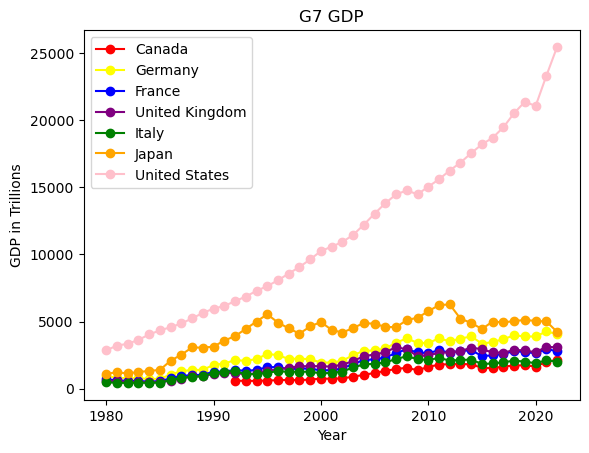

In [11]:
unique_countries = G7_gdp_columns_data['Country'].unique()
colors = {'France':'blue', 'Germany':'yellow', 'Italy':'green', 'Japan':'orange', 
         'United Kingdom':'purple', 'United States':'pink','Canada':'red'}

for country in unique_countries:
    country_data = G7_gdp_columns_data[G7_gdp_columns_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP in Trillions'], marker='o', linestyle='-', 
             label=country, color=colors[country])

plt.xlabel('Year')
plt.ylabel('GDP in Trillions')
plt.title('G7 GDP')
plt.legend()
plt.show()

In [37]:
data_2022 = G7_gdp_columns_data[G7_gdp_columns_data['Year']==2022]
plt.figure(figsize=(10, 6))
colors=['red', 'yellow', 'blue', 'green', 'orange', 'purple', 'pink']
plt.pie(data_2022['GDP in Trillions'], labels=data_2022['Country'], autopct='%1.1f%%', startangle=290, color='colors')
plt.title('GDP Distribution by G7 Countries in 2022')
plt.show()

TypeError: pie() got an unexpected keyword argument 'color'

<Figure size 1000x600 with 0 Axes>

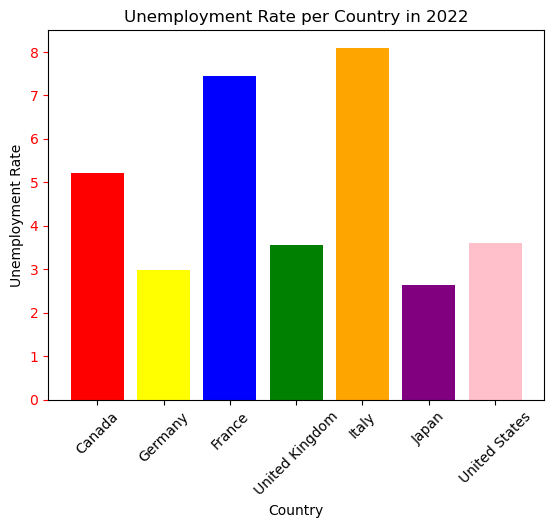

In [33]:
#fig, ax1= plt.subplots()

plt.bar(data_2022['Country'], data_2022['Unemployment Rate'], color=['red', 'yellow', 'blue', 'green', 
                                                                     'orange', 'purple', 'pink'])
    
plt.xlabel('Country')
plt.ylabel('Unemployment Rate')
plt.tick_params('y', colors='red')
plt.xticks(rotation=45)
plt.title('Unemployment Rate per Country in 2022')
plt.show()